<img src='barragem.jpg'>

## Carregando bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

import sys
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

sns.set()
pd.options.display.max_columns = 500
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 5]

## Análise dos dados das barragens

https://www.kaggle.com/datasets/edumagalhaes/brazilian-dams-and-brumadinho-households

In [4]:
barragens = pd.read_csv('database_versao_LatLongDecimal_fonteANM_23_01_2019.csv',
                       sep=',',
                       decimal=',',
                       dtype={
                           'LATITUDE': 'string',
                           'LONGITUDE': 'string',
                           'NOME_BARRAGEM_MINERACAO': 'string',
                           'CPF_CNPJ': 'string',
                       },
                    )

In [5]:
barragens.head(3)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"27,700,000.00",Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.30,"924,000.00",Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.00,"48,873.00",Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778


In [6]:
barragens.shape

(714, 15)

In [7]:
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string
 1   NOME_DO_EMPREENDEDOR      714 non-null    object
 2   CPF_CNPJ                  714 non-null    string
 3   POSICIONAMENTO            714 non-null    object
 4   UF                        714 non-null    object
 5   MUNICIPIO                 714 non-null    object
 6   MINERIO_PRINCIPAL         714 non-null    object
 7   ALTURA_ATUAL_metros       714 non-null    object
 8   VOLUME_ATUAL_m3           714 non-null    object
 9   CATEGORIA_DE_RISCO        390 non-null    object
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object
 11  CLASSE                    390 non-null    object
 12  INSERIDA_NA_PNSB          714 non-null    object
 13  LATITUDE                  714 non-null    string
 14  LONGITUDE                 

In [8]:
# precisamos converter os campos de altura e volume de texto para o formato numérico
# primeiro: troca a virgula por espaco vazio. 27,700,700.00 por 27700700.00
barragens['ALTURA_ATUAL_metros'] = barragens['ALTURA_ATUAL_metros'].str.replace(',', '')

# segundo: vieram hifens representando nulos. troca rhifen por nulo
barragens['ALTURA_ATUAL_metros'] = barragens['ALTURA_ATUAL_metros'].replace('-', np.nan)

#terceiro: converte para numerico
barragens['ALTURA_ATUAL_metros'] = pd.to_numeric(barragens['ALTURA_ATUAL_metros'])

barragens['VOLUME_ATUAL_m3'] = barragens['VOLUME_ATUAL_m3'].str.replace(',', '')
barragens['VOLUME_ATUAL_m3'] = barragens['VOLUME_ATUAL_m3'].replace('-', np.nan)
barragens['VOLUME_ATUAL_m3'] = pd.to_numeric(barragens['VOLUME_ATUAL_m3'])

# verifica resultado das alteracoes
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string 
 1   NOME_DO_EMPREENDEDOR      714 non-null    object 
 2   CPF_CNPJ                  714 non-null    string 
 3   POSICIONAMENTO            714 non-null    object 
 4   UF                        714 non-null    object 
 5   MUNICIPIO                 714 non-null    object 
 6   MINERIO_PRINCIPAL         714 non-null    object 
 7   ALTURA_ATUAL_metros       697 non-null    float64
 8   VOLUME_ATUAL_m3           707 non-null    float64
 9   CATEGORIA_DE_RISCO        390 non-null    object 
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object 
 11  CLASSE                    390 non-null    object 
 12  INSERIDA_NA_PNSB          714 non-null    object 
 13  LATITUDE                  714 non-null    string 
 14  LONGITUDE 

In [9]:
barragens.head()

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,27700000.0,Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.3,924000.0,Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,48873.0,Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778
3,158 (A-1),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,30.0,53380000.0,Baixa,Alta,B,Sim,0.738027777777778,-60.0789166666667
4,161 (A-2),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,1018054.0,Baixa,Média,C,Sim,0.732286944444444,-60.0689988888889


In [14]:
barragens.isna().sum()
barragens.isna().mean()

NOME_BARRAGEM_MINERACAO       0
NOME_DO_EMPREENDEDOR          0
CPF_CNPJ                      0
POSICIONAMENTO                0
UF                            0
MUNICIPIO                     0
MINERIO_PRINCIPAL             0
ALTURA_ATUAL_metros          17
VOLUME_ATUAL_m3               7
CATEGORIA_DE_RISCO          324
DANO_POTENCIAL_ASSOCIADO    324
CLASSE                      324
INSERIDA_NA_PNSB              0
LATITUDE                      0
LONGITUDE                     0
dtype: int64

NOME_BARRAGEM_MINERACAO     0.000000
NOME_DO_EMPREENDEDOR        0.000000
CPF_CNPJ                    0.000000
POSICIONAMENTO              0.000000
UF                          0.000000
MUNICIPIO                   0.000000
MINERIO_PRINCIPAL           0.000000
ALTURA_ATUAL_metros         0.023810
VOLUME_ATUAL_m3             0.009804
CATEGORIA_DE_RISCO          0.453782
DANO_POTENCIAL_ASSOCIADO    0.453782
CLASSE                      0.453782
INSERIDA_NA_PNSB            0.000000
LATITUDE                    0.000000
LONGITUDE                   0.000000
dtype: float64

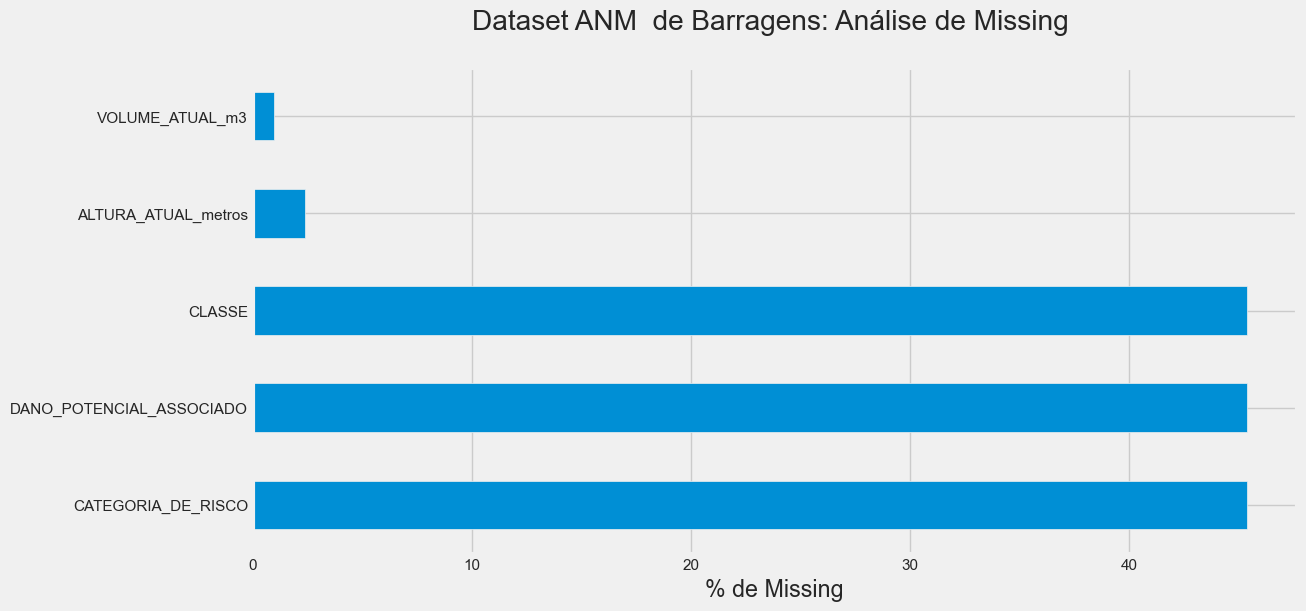

In [15]:
# % de missing
na_cols = [col for col in barragens if (barragens[col].isna().sum() > 0)] # pega colunas que tem missing
ax = ( barragens[na_cols]
     .isna()
      .mean() #percentual de missing
      .sort_values(ascending=False) # ordena de forma decrescente
      .mul(100) # em centenas (ao inves de ser 0.45 vei ser 45)
      .plot(kind='barh', figsize=(12, 6)) # plota grafico de barras horizontal
     )

_ = ax.set_xlabel('% de Missing') # titulo do eixo x
_ = ax.set_title('Dataset ANM  de Barragens: Análise de Missing \n') # titulo

In [20]:
barragens['CATEGORIA_DE_RISCO'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
709     True
710     True
711     True
712     True
713     True
Name: CATEGORIA_DE_RISCO, Length: 714, dtype: bool

In [18]:
barragens[barragens['CATEGORIA_DE_RISCO'].isna()].head(5)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
390,22,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,6.0,56519.00,NaN,NaN,NaN,Não,0.738638888888889,-60.1673888888889
391,42,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,4.9,130979.00,NaN,NaN,NaN,Não,0.723527777777778,-60.1967222222222
392,69,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,84941.00,NaN,NaN,NaN,Não,0.743194444444444,-60.2014166666667
393,189,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,209969.00,NaN,NaN,NaN,Não,0.789555555555556,-60.0130277777778
394,1-30,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,8.0,1320.09,NaN,NaN,NaN,Não,0.707111111111111,-60.1925277777778


In [21]:
barragens[barragens["CATEGORIA_DE_RISCO"].isna()].describe()

,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3
count,307.000000,3.170000e+02
mean,6.961922,1.417104e+05
std,3.739758,2.813656e+05
min,1.000000,1.000000e-02
25%,4.000000,5.250000e+03
50%,6.200000,2.000000e+04
75%,10.000000,1.400590e+05
max,14.900000,1.965306e+06


In [22]:
barragens['dummy_PNSB'] = np.where(barragens['INSERIDA_NA_PNSB'] == 'Sim', 1, 0)
barragens['dummy_PNSB'].value_counts()

1    390
0    324
Name: dummy_PNSB, dtype: int64

In [23]:
barragens['dummy_PNSB'].value_counts(normalize=True)

1    0.546218
0    0.453782
Name: dummy_PNSB, dtype: float64

In [26]:
# resumo por minerio
resumo = (
        barragens.groupby(['MINERIO_PRINCIPAL'], sort=False)
        .agg(
        sum_pnsb=('dummy_PNSB', 'sum'),
        max_altura=('ALTURA_ATUAL_metros', 'max'),
        max_volume=('VOLUME_ATUAL_m3', 'max'),
        media_altura=('ALTURA_ATUAL_metros', 'mean'),
        media_volume=('VOLUME_ATUAL_m3', 'mean'),
        )
    .reset_index()
)

resumo.sort_values(by='sum_pnsb').head()

,MINERIO_PRINCIPAL,sum_pnsb,max_altura,max_volume,media_altura,media_volume
56,Sais,0,6.00,6362.07,6.0000,6362.070000
44,Magnesita,0,4.78,52912.30,4.7800,52912.300000
45,Bentonita,0,14.00,7500.00,14.0000,7500.000000
46,Cromita,0,14.60,201205.00,6.7125,73405.428571
47,Areia Quartzosa,0,9.00,6897.00,6.2500,4034.000000


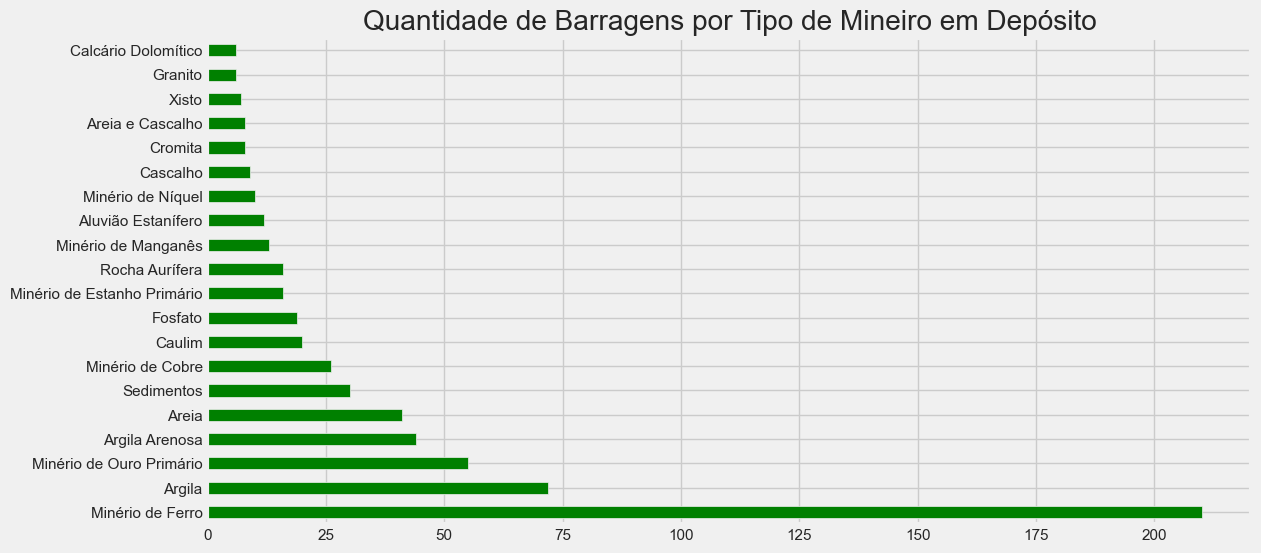

In [28]:
_ = plt.figure(1, figsize=(12, 6))
_ = barragens['MINERIO_PRINCIPAL'].value_counts()[:20].plot(kind='barh', color='green')
_ = plt.title('Quantidade de Barragens por Tipo de Mineiro em Depósito')

In [29]:
barragens[barragens['MINERIO_PRINCIPAL'] == 'Minério de Ferro'].head(5)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB
12,VILA NOVA,Unamgen Mineração e Metalurgia S.a.,42.593.269/0001-79,Norte do Equador,AP,MAZAGÃO,Minério de Ferro,15.5,440300.0,Baixa,Baixa,E,Sim,0.401673888888889,-51.7578088888889,1
38,5 (MAC),Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,78.0,13718217.0,Baixa,Alta,B,Sim,-19.9770866666667,-43.8930027777778,1
39,5 (Mutuca),Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,55.0,7100000.0,Baixa,Alta,B,Sim,-20.0262258333333,-43.9425625,1
40,7B,Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,27.4,79431.0,Baixa,Alta,B,Sim,-19.967365,-43.8829791666667,1
41,8B,Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,28.0,92635.0,Baixa,Alta,B,Sim,-19.9594205555556,-43.8726,1


In [31]:
 barragens = pd.concat(
     [
         barragens,
         pd.get_dummies(barragens['CATEGORIA_DE_RISCO'], prefix='Categoria_de_Risco'),
     ],
    axis=1,
 )

In [32]:
barragens.head()

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,27700000.0,Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889,1,0,1,0
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.3,924000.0,Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667,1,0,1,0
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,48873.0,Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778,1,0,1,0
3,158 (A-1),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,30.0,53380000.0,Baixa,Alta,B,Sim,0.738027777777778,-60.0789166666667,1,0,1,0
4,161 (A-2),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,1018054.0,Baixa,Média,C,Sim,0.732286944444444,-60.0689988888889,1,0,1,0


In [33]:
barragens.groupby('CATEGORIA_DE_RISCO')['ALTURA_ATUAL_metros'].mean()

CATEGORIA_DE_RISCO
Alta     28.666667
Baixa    27.960723
Média    16.377273
Name: ALTURA_ATUAL_metros, dtype: float64

In [34]:
barragens.groupby('CATEGORIA_DE_RISCO')['VOLUME_ATUAL_m3'].mean()

CATEGORIA_DE_RISCO
Alta     3.380292e+05
Baixa    8.960697e+06
Média    2.019007e+06
Name: VOLUME_ATUAL_m3, dtype: float64

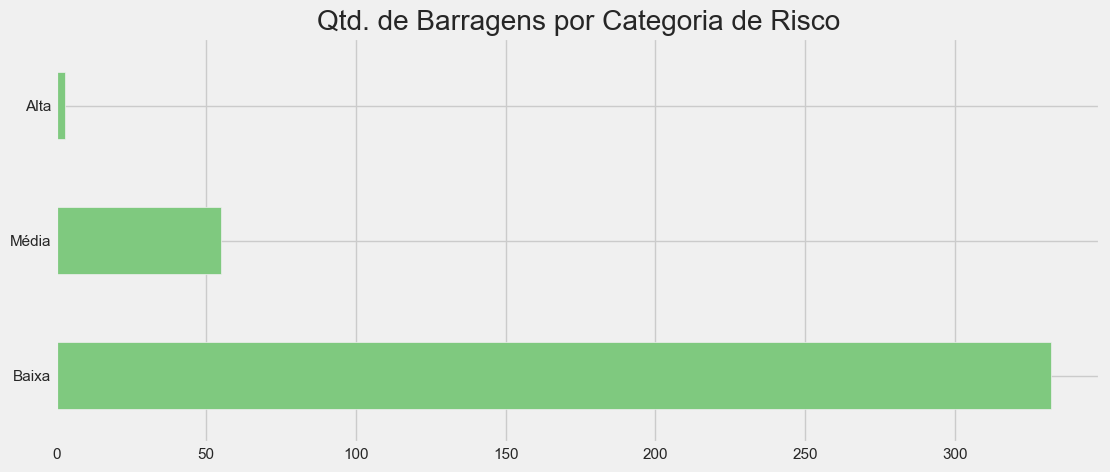

In [35]:
_ = plt.figure(1, figsize=(12, 5))
_ = barragens['CATEGORIA_DE_RISCO'].value_counts().plot(kind='barh', colormap='Accent')
_ = plt.title('Qtd. de Barragens por Categoria de Risco')

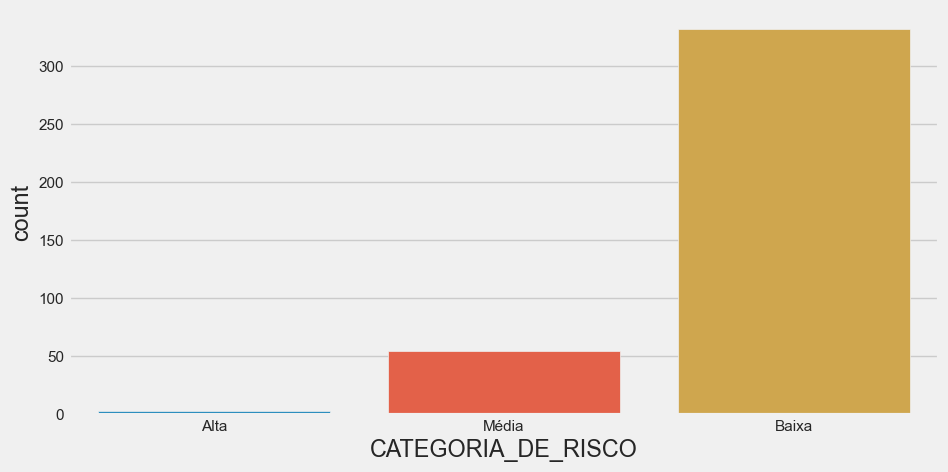

In [38]:
sns.countplot(
    x="CATEGORIA_DE_RISCO",
    data=barragens,
    order=barragens['DANO_POTENCIAL_ASSOCIADO'].value_counts().index,
);

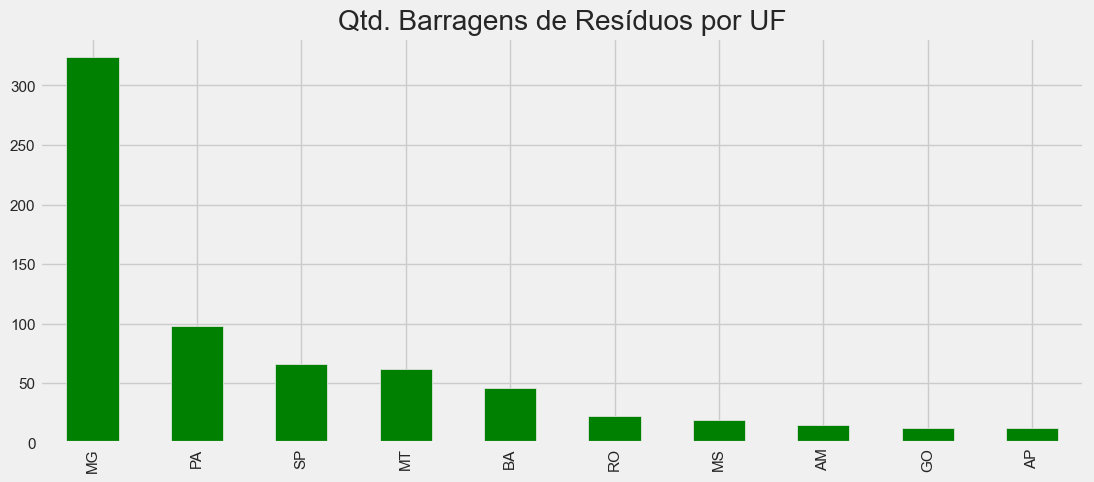

In [40]:
# quantidade de barragens X UF
plt.figure(1, figsize=(12, 5))
barragens['UF'].value_counts()[:10].plot(kind='bar', color='green')
plt.title('Qtd. Barragens de Resíduos por UF');

In [42]:
 barragens = pd.concat(
     [
         barragens,
         pd.get_dummies(barragens['DANO_POTENCIAL_ASSOCIADO'], 'Dano_Potencial_'),
     ],
    axis=1,
 )

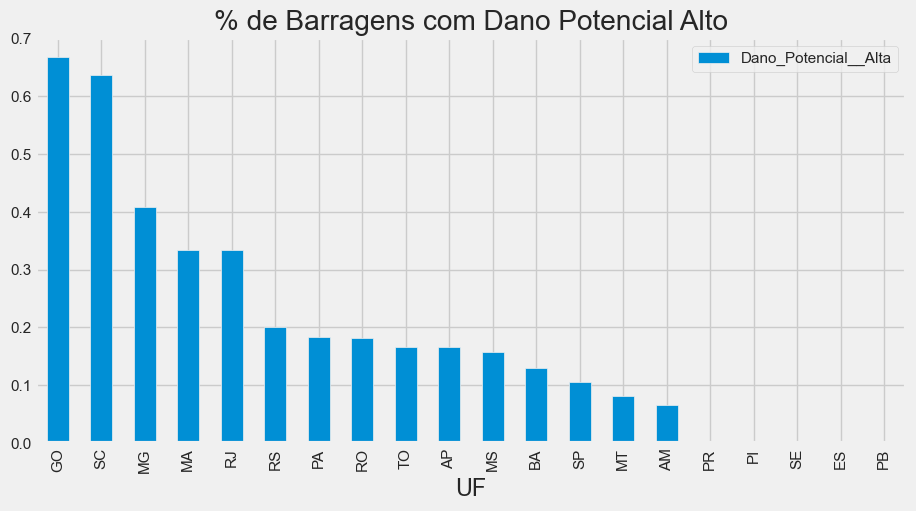

In [45]:
# algum estado possui mais barragens por risco?

(
pd.pivot_table(
data=barragens, index=['UF'], values=['Dano_Potencial__Alta'], aggfunc='mean'
)
.sort_values(by='Dano_Potencial__Alta', ascending=False)
.plot(kind='bar')
)
plt.title('% de Barragens com Dano Potencial Alto');

In [46]:
# Risco de acordo com UF
resumo_por_uf = (
    barragens.groupby(["UF"], sort=False)
    .agg(
        contagem_geral=("Dano_Potencial__Alta", "count"),
        contagem_por_risco_alto=("Dano_Potencial__Alta", "sum"),
        perc_de_risco_alto=("Dano_Potencial__Alta", "mean"),
        Missing_Risco=("CATEGORIA_DE_RISCO", lambda x: x.isnull().mean(),),
        Missing_Dano=("DANO_POTENCIAL_ASSOCIADO", lambda x: x.isnull().mean(),),
    )
    .reset_index()
    .round(1)
)

resumo_por_uf.sort_values(by="contagem_geral", ascending=False).head()

,UF,contagem_geral,contagem_por_risco_alto,perc_de_risco_alto,Missing_Risco,Missing_Dano
6,MG,324,132,0.4,0.4,0.4
9,PA,98,18,0.2,0.3,0.3
16,SP,66,7,0.1,0.7,0.7
8,MT,62,5,0.1,0.5,0.5
2,BA,46,6,0.1,0.7,0.7


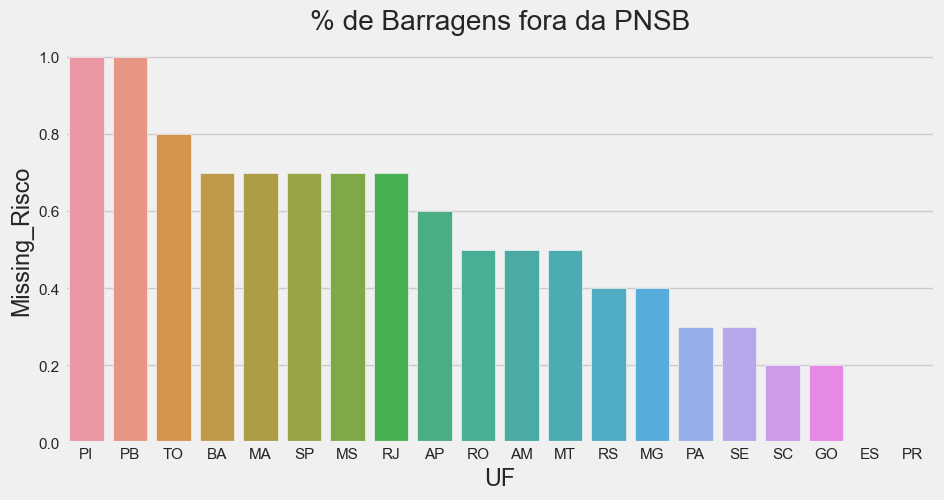

In [47]:
_ = sns.barplot(
    data=resumo_por_uf.sort_values(by="Missing_Risco", ascending=False),
    x="UF",
    y="Missing_Risco",
)
_ = plt.title("% de Barragens fora da PNSB")

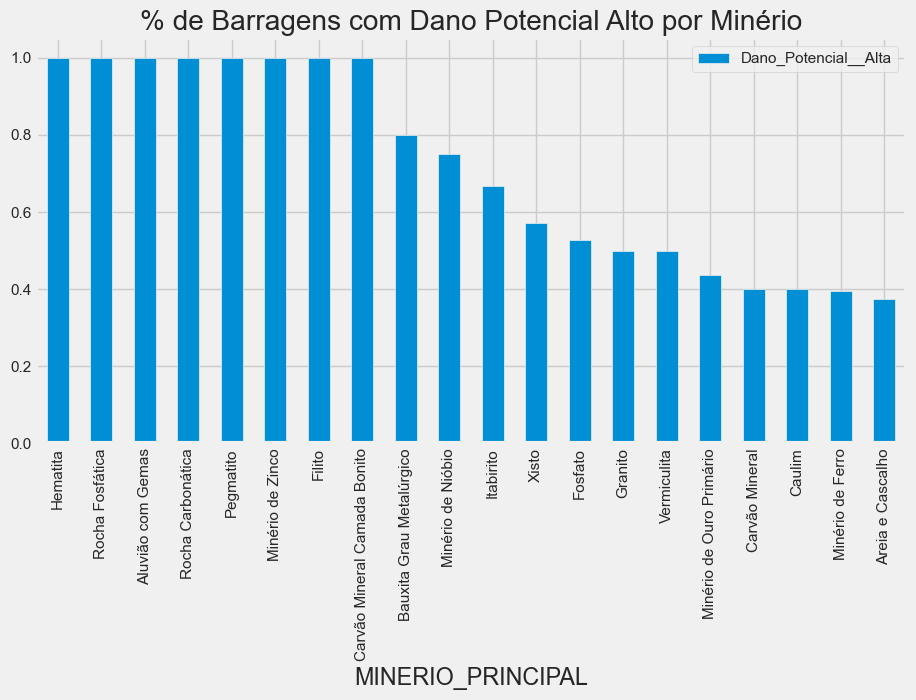

In [48]:
# E o risco por material
_ = (
    pd.pivot_table(
        data=barragens,
        index=["MINERIO_PRINCIPAL"],
        values=["Dano_Potencial__Alta"],
        aggfunc="mean",
    )
    .sort_values(by="Dano_Potencial__Alta", ascending=False)
    .head(20)
    .plot(kind="bar")
)
_ = plt.title("% de Barragens com Dano Potencial Alto por Minério")